In [2]:
%matplotlib notebook

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits

from donutlib import decamutil
dinfo = decamutil.decaminfo()

In [2]:
hdu = fits.open("/u/ec/roodman/kipacdisk/PIFF/psf_y3a1-v29.fits")
hdu.info()

Filename: /u/ec/roodman/kipacdisk/PIFF/psf_y3a1-v29.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     42   56707987R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, J, I, 1A, I]   


In [3]:
# get the datatable
table = hdu[1].data
print(table.columns)
print(len(table))

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'obs_e1'; format = 'D'
    name = 'obs_e2'; format = 'D'
    name = 'obs_T'; format = 'D'
    name = 'piff_e1'; format = 'D'
    name = 'piff_e2'; format = 'D'
    name = 'piff_T'; format = 'D'
    name = 'mag'; format = 'D'
    name = 'fov_x'; format = 'D'
    name = 'fov_y'; format = 'D'
    name = 'exp'; format = 'J'
    name = 'ccd'; format = 'I'
    name = 'band'; format = '1A'
    name = 'tiling'; format = 'I'
)
56707987


In [4]:
# select just i band exposures
itable = table[(table['band']=='i')]
print(len(itable))

13434631


<IPython.core.display.Javascript object>


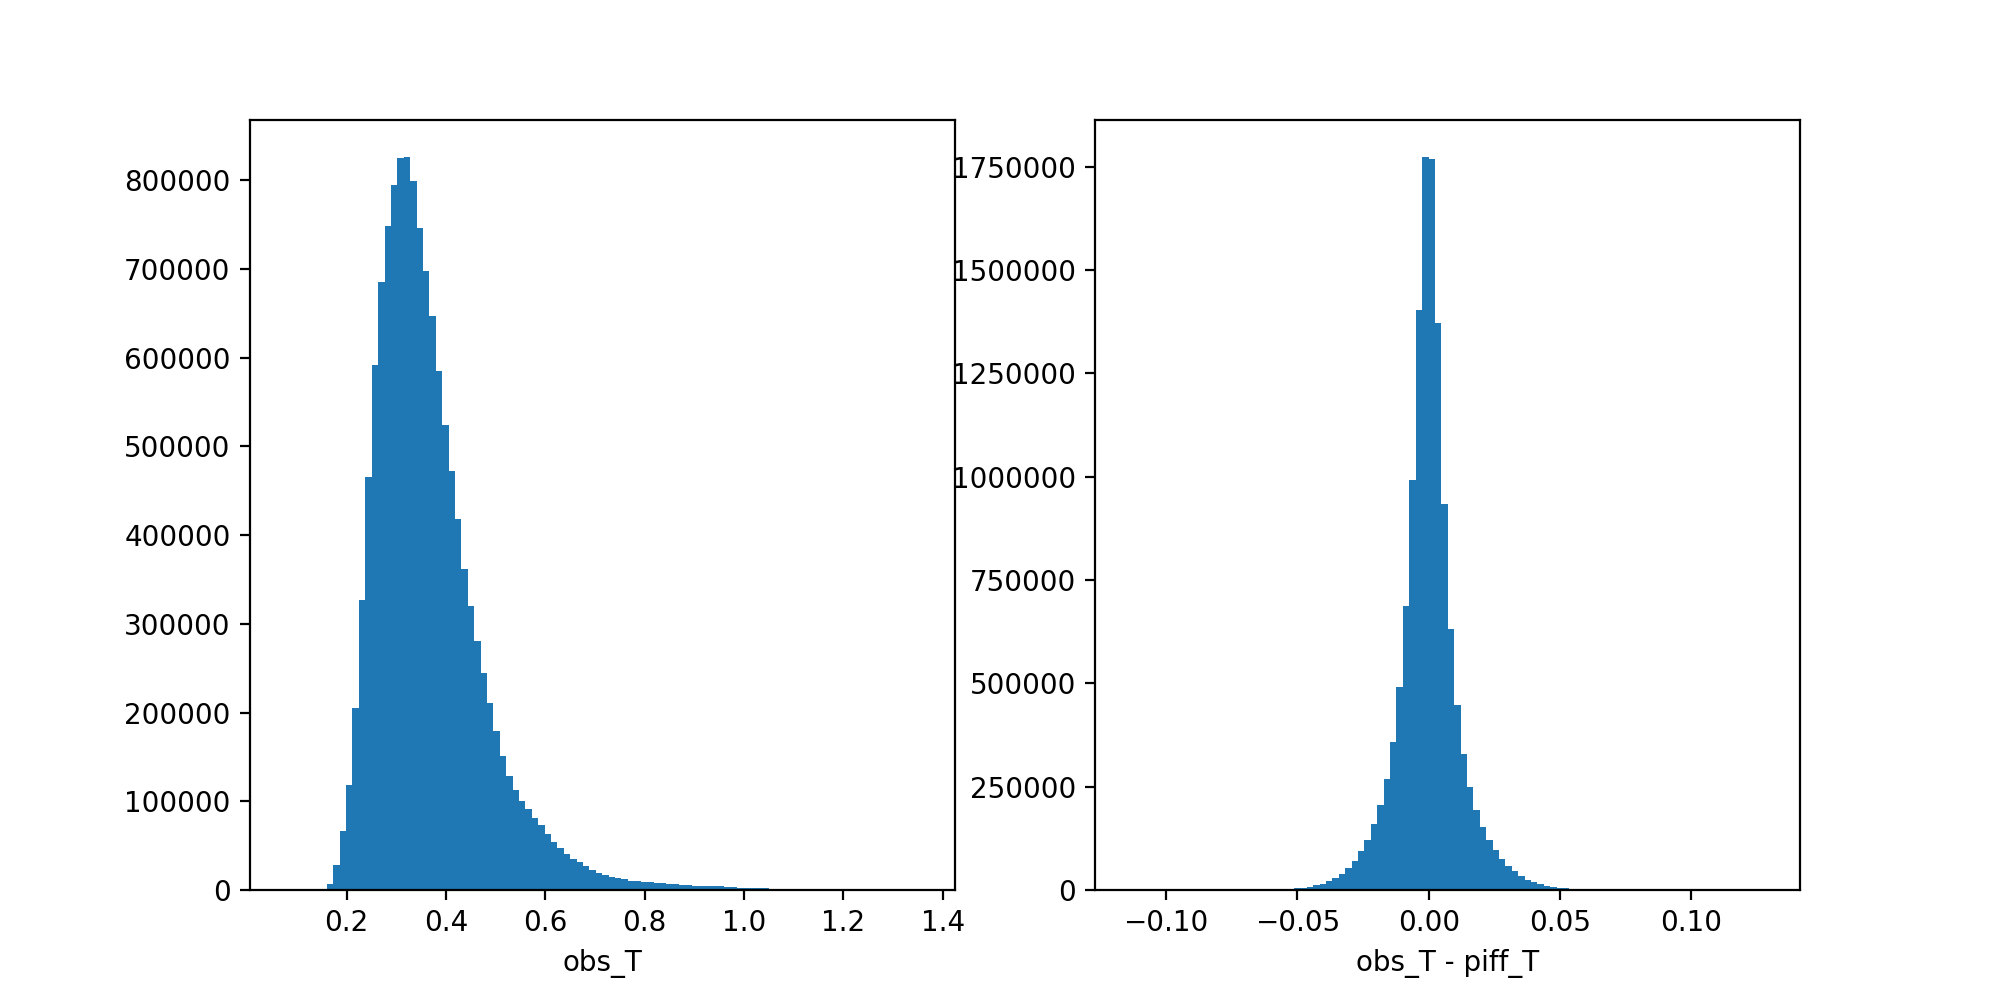

Text(0.5, 0, 'obs_T - piff_T')

In [22]:
# histogram obs_T - piff_T
f,ax = plt.subplots(1,2,figsize=(10,5))
h = ax[0].hist(itable['obs_T'],bins=100)
ax[0].set_xlabel('obs_T')
h = ax[1].hist(itable['obs_T']-itable['piff_T'],bins=100)
ax[1].set_xlabel('obs_T - piff_T')

<IPython.core.display.Javascript object>


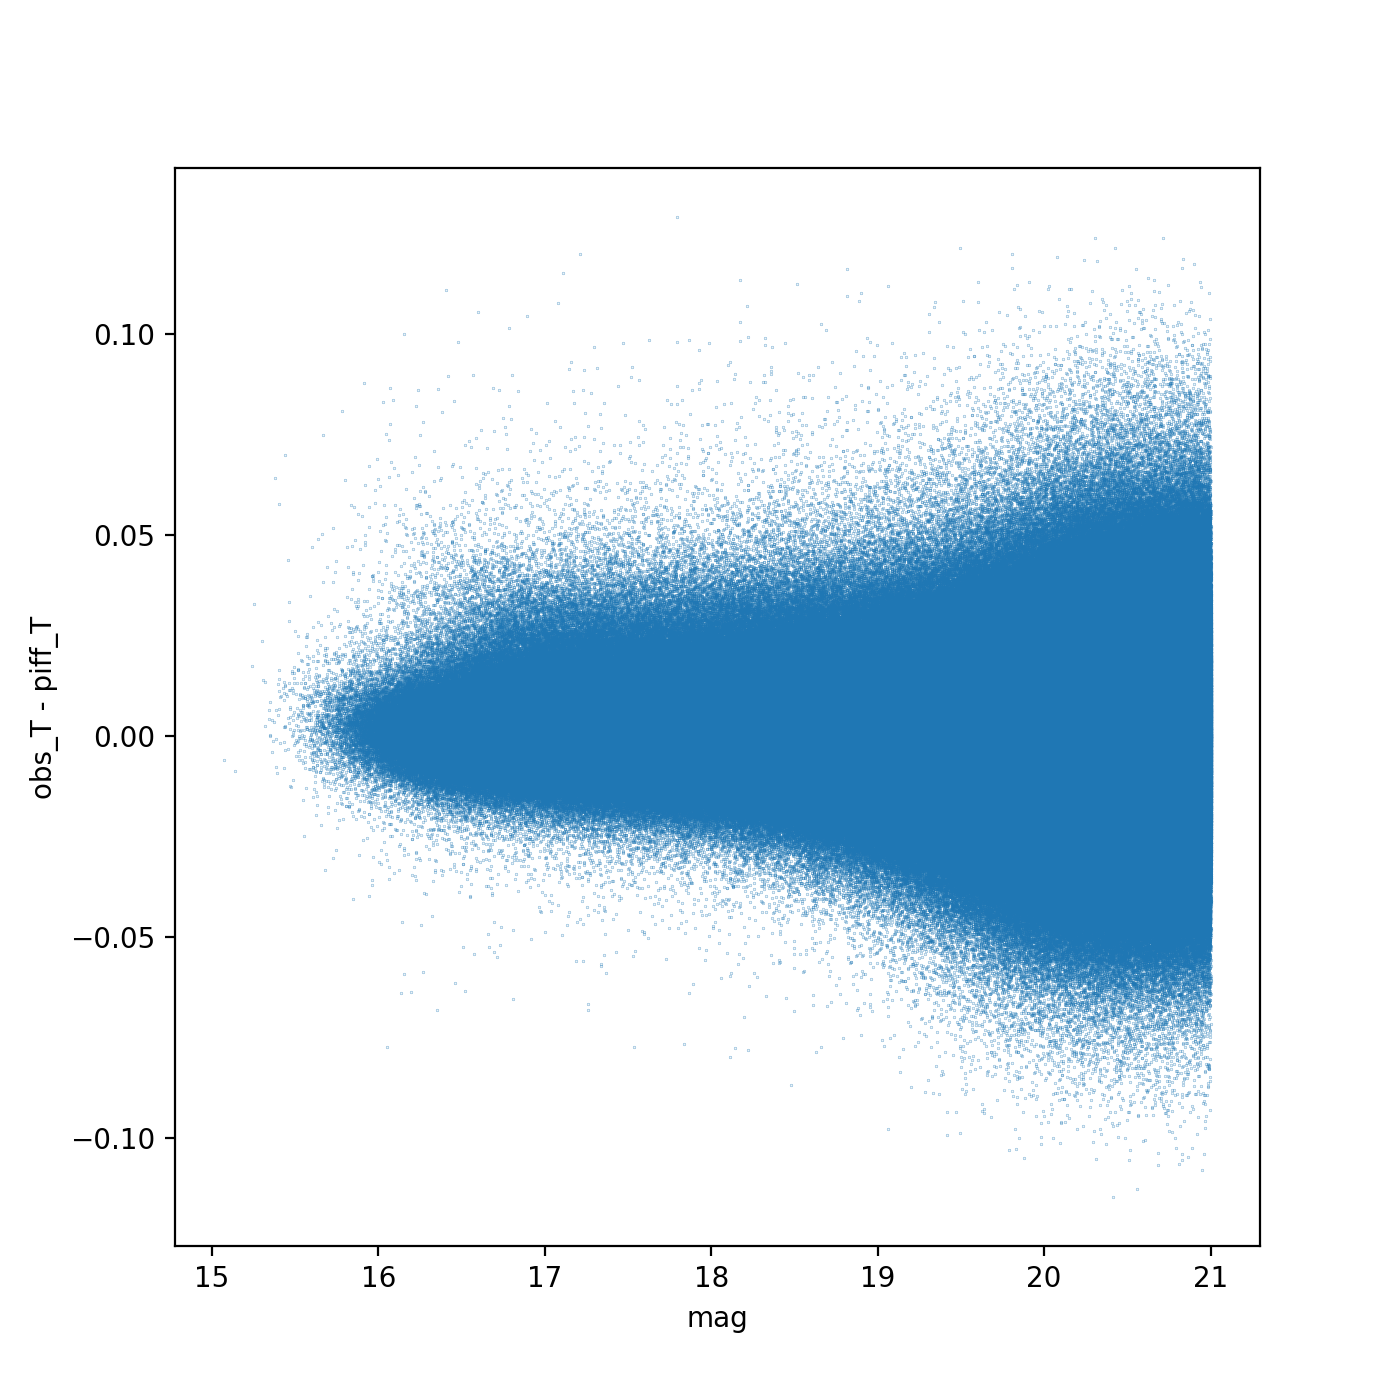

Text(0.5, 0, 'mag')

In [23]:
# scatter plot of mag vs. obs_T - piff_T 
f,ax = plt.subplots(1,1,figsize=(7,7))
h = ax.scatter(itable['mag'],itable['obs_T']-itable['piff_T'],marker='.',s=0.05)
ax.set_ylabel('obs_T - piff_T')
ax.set_xlabel('mag')

<IPython.core.display.Javascript object>


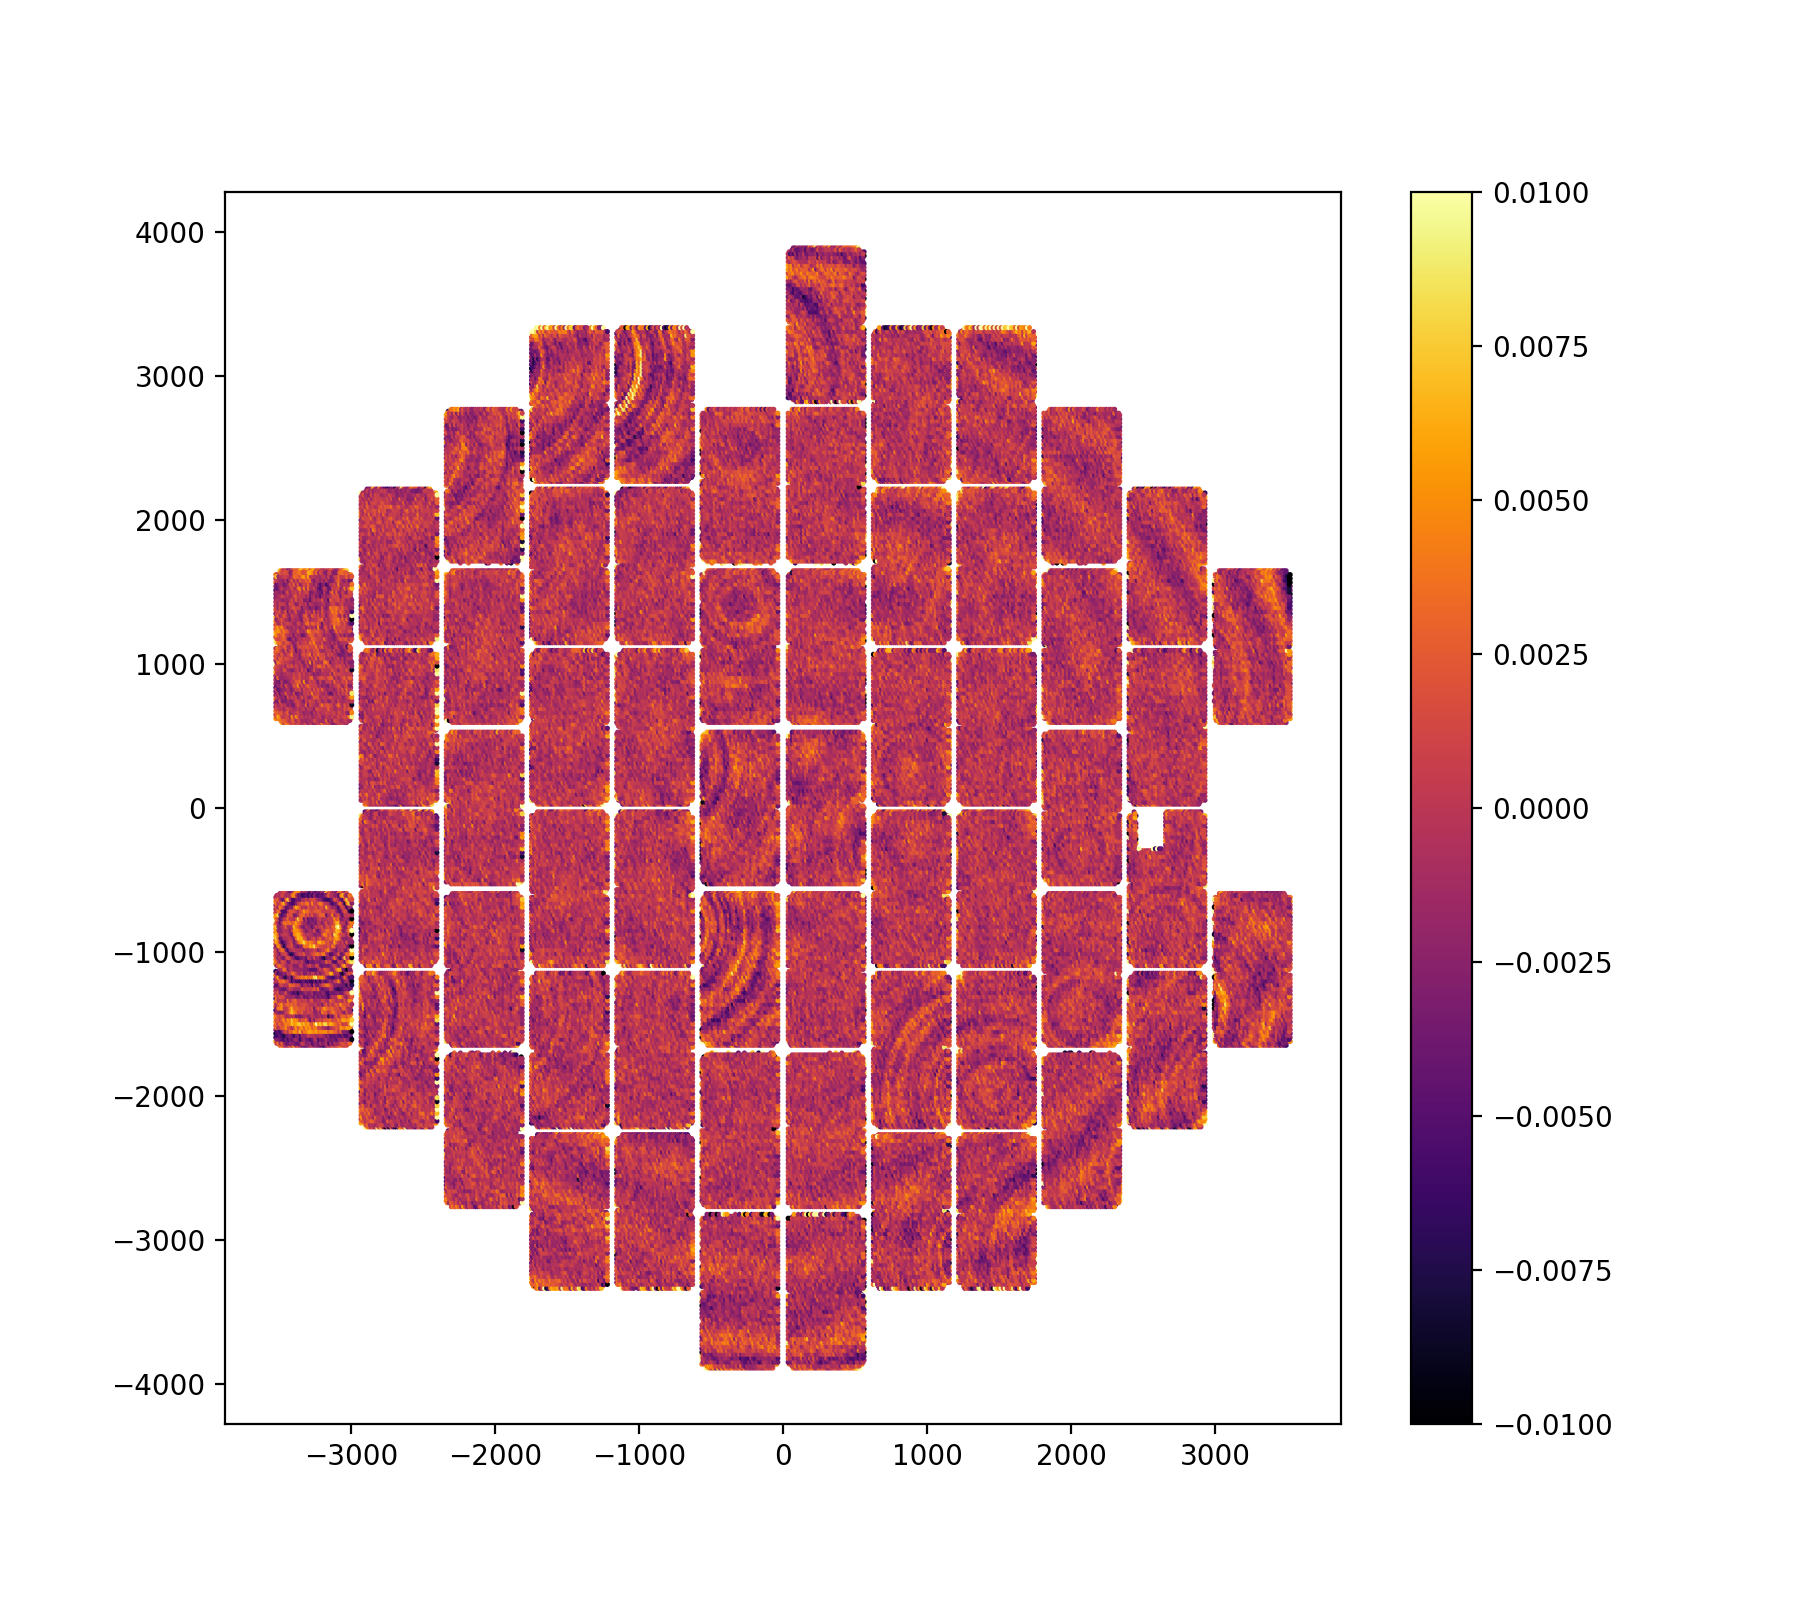

In [24]:
# fov_x and fov_y are in units of arcsec, and x,y are FocalPlane coordinates
f,ax = plt.subplots(1,1,figsize=(9,8))
ngrid = 500
vmax = 0.01
cset = ax.hexbin(itable['fov_x'], itable['fov_y'], itable['obs_T']-itable['piff_T'], gridsize=ngrid, cmap='inferno', vmin=-vmax, vmax=vmax)
f.colorbar(cset,ax=ax)

Test how the fov_x and fov_y are calculated. The cell below shows that fov_x,y come from getPosition_chipnum, being careful to subtract 1/2 a pixel, and using a mean plate scale of 0.263

<IPython.core.display.Javascript object>


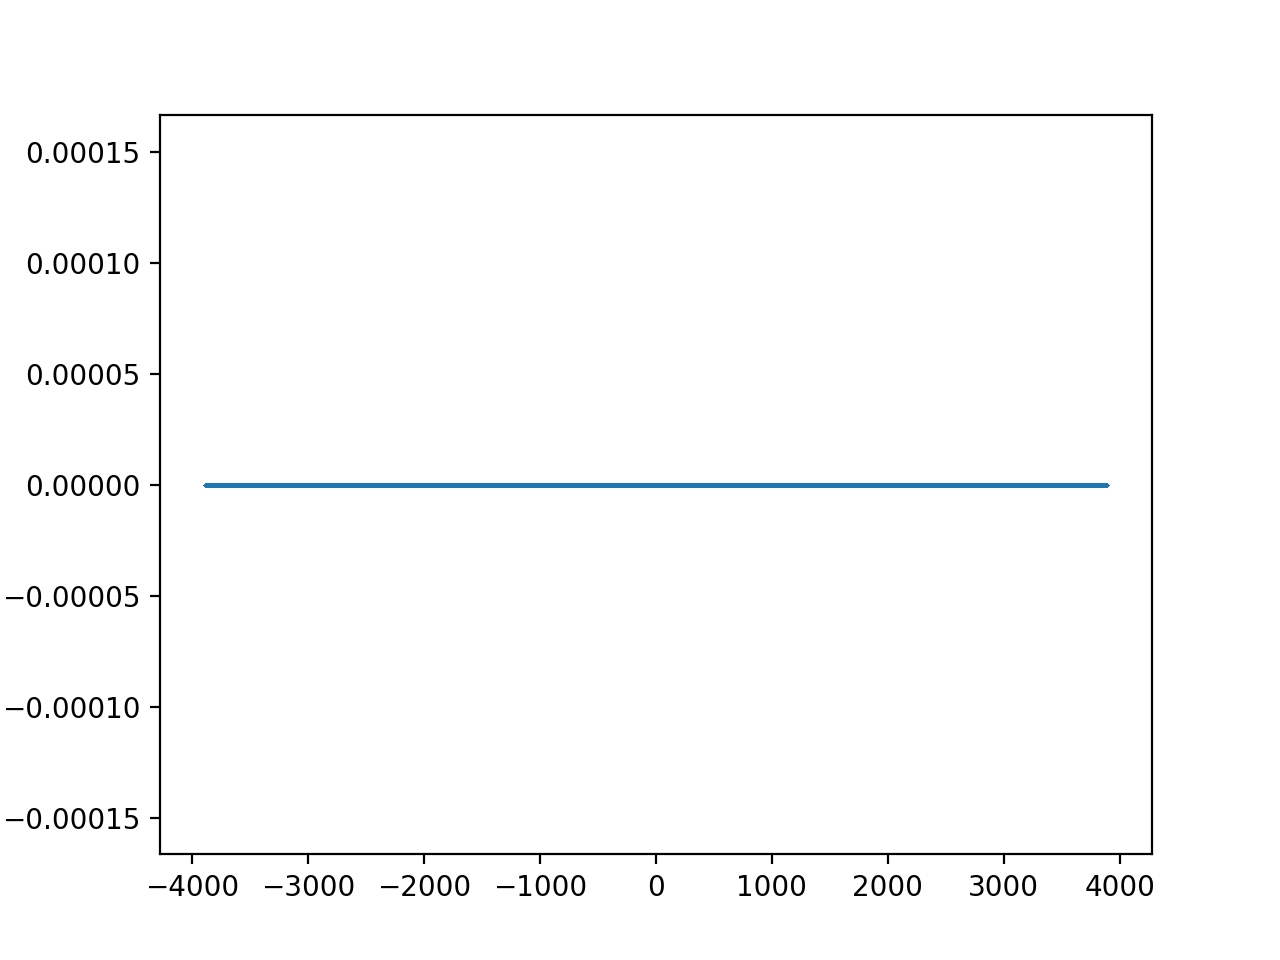

In [28]:
from piff.des.decaminfo import DECamInfo
dinfo = DECamInfo()

# catalog positions are set to come from pixel center 
# so subtract 1/2 a pixel for the calculations here!

# get fov_x,fov_y 
ix = itable['x'][:] - 0.5
iy = itable['y'][:] - 0.5
chipnums = itable['ccd'][:]
fov_x,fov_y = dinfo.getPosition_chipnum(chipnums, ix, iy)
factor = (0.015/0.263) 
fov_x /= factor
fov_y /= factor

# compare code in getPosition to this catalog 
factor = (0.015/0.263) 
f,ax = plt.subplots(1,1)
ax.scatter(itable['fov_y'],itable['fov_y']-fov_y,marker='.',s=0.05)

# Make same plots for Y1 PSF data

In [4]:
hduy1 = fits.open("/u/ec/roodman/kipacdisk/PIFF/psf_y1a1-v13.fits")
hduy1.info()
tabley1 = hduy1[1].data
print(tabley1.columns)
print(len(tabley1))

Filename: /u/ec/roodman/kipacdisk/PIFF/psf_y1a1-v13.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     40   14468770R x 16C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, I]   
ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'e1'; format = 'D'
    name = 'e2'; format = 'D'
    name = 'size'; format = 'D'
    name = 'psf_e1'; format = 'D'
    name = 'psf_e2'; format = 'D'
    name = 'psf_size'; format = 'D'
    name = 'exp'; format = 'D'
    name = 'ccd'; format = 'D'
    name = 'fov_x'; format = 'D'
    name = 'fov_y'; format = 'D'
    name = 'filter'; format = '1A'
    name = 'tiling'; format = 'I'
)
14468770


In [6]:
# select just i band exposures
itabley1 = tabley1[(tabley1['filter']=='i')]
print(len(itabley1))

4077308


<IPython.core.display.Javascript object>


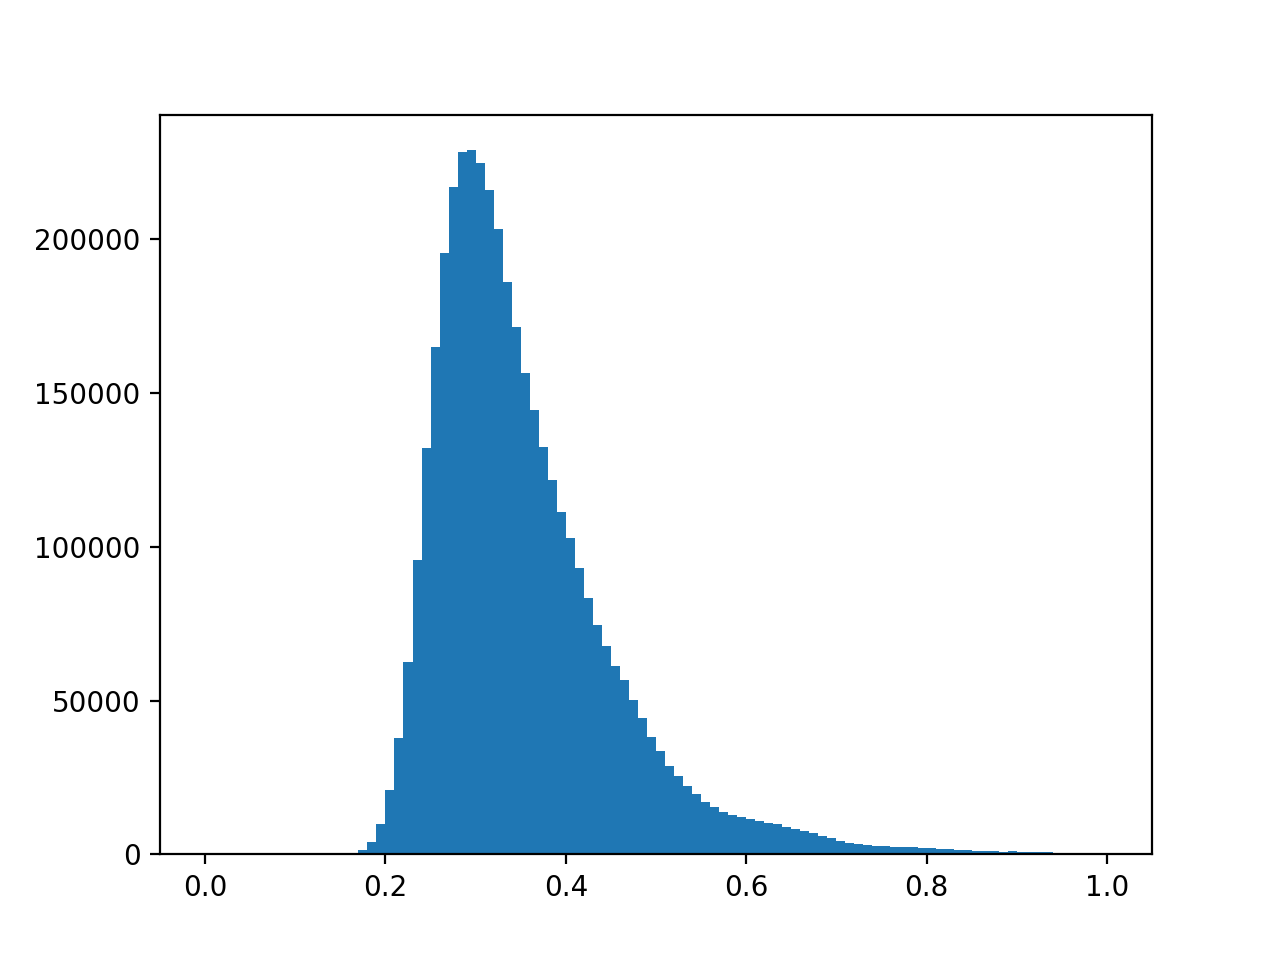

In [11]:
# size in Y1
f,ax = plt.subplots(1,1)
h = ax.hist(2.*itabley1['size']*itabley1['size'],bins=100,range=(0.,1.))

<IPython.core.display.Javascript object>


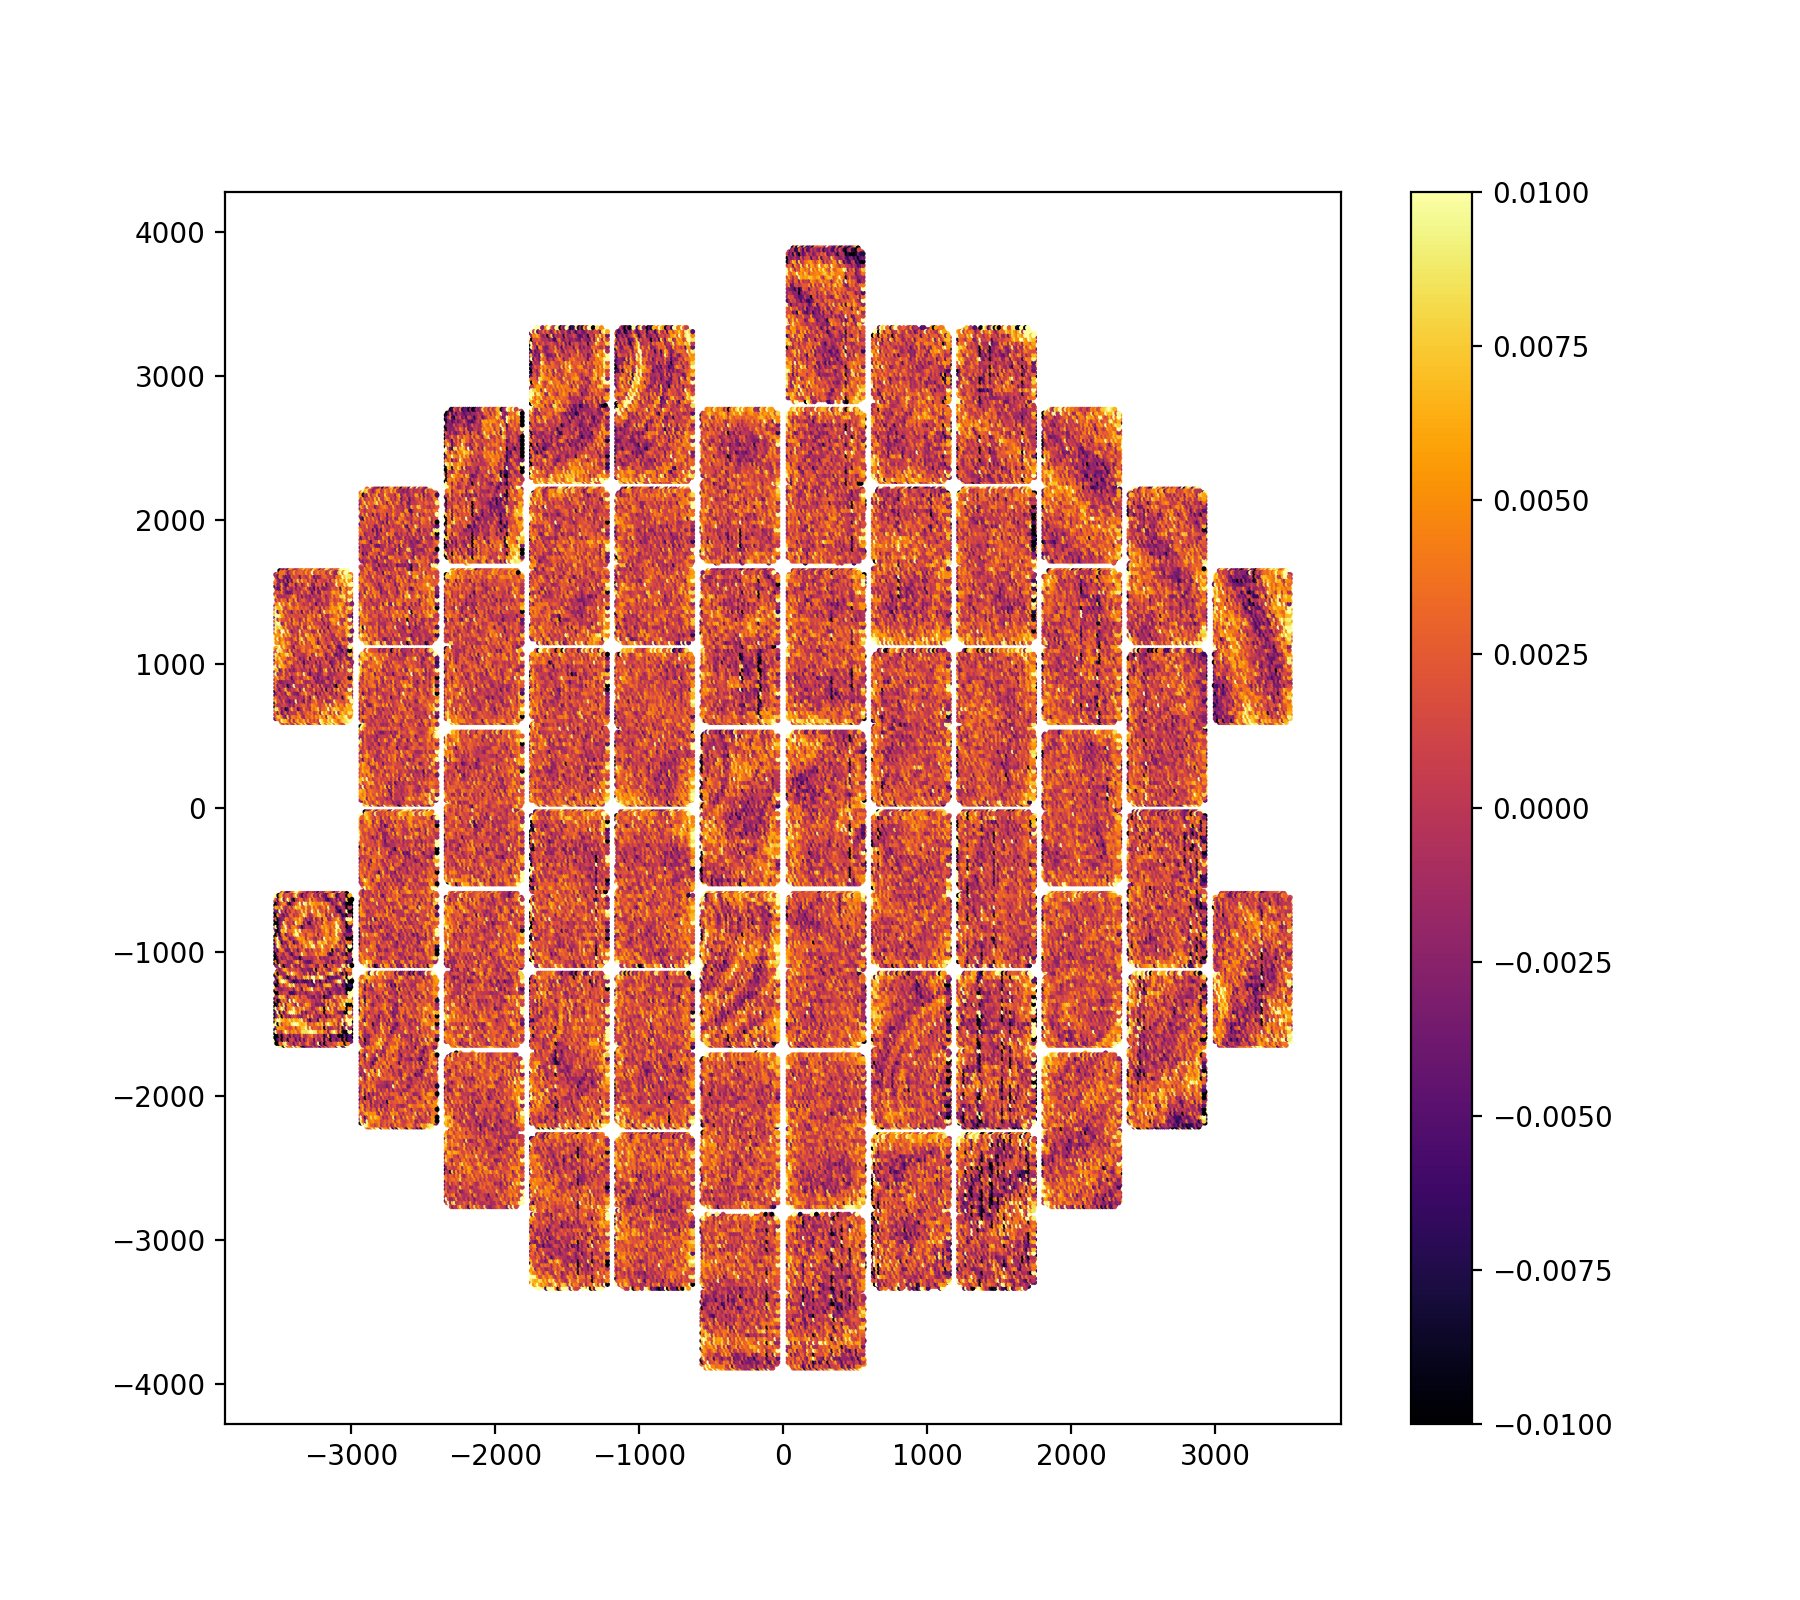

In [12]:
# fov_x and fov_y are in units of arcsec, and x,y are FocalPlane coordinates
f,ax = plt.subplots(1,1,figsize=(9,8))
ngrid = 500
vmax = 0.01
T = 2.*itabley1['size']*itabley1['size']
psf_T = 2.*itabley1['psf_size']*itabley1['psf_size']

cset = ax.hexbin(itabley1['fov_x'], itabley1['fov_y'], T-psf_T, gridsize=ngrid, cmap='inferno', vmin=-vmax, vmax=vmax)
f.colorbar(cset,ax=ax)